In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y_initial = (iris.target != 0) * 1
y = y_initial.reshape(y_initial.shape[0], 1)

In [3]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X_s = np.divide(np.subtract(X, mean), std)
x = np.hstack([np.ones((X_s.shape[0], 1)), X_s])
thetas = np.random.uniform(-1, 1, (3, 1))

In [4]:
eta = 0.01
i = 0
term = 2 ** -23
def sigmoid(x, thetas):
    return 1/(1 + np.exp(-1 * (x @ thetas)))
def cost(x, y, thetas):
    hypothesis = sigmoid(x, thetas)
    return -1/x.shape[0] * (y.T @ np.log(hypothesis) + np.subtract(1, y).T @ np.subtract(1, np.log(hypothesis)))
prev_cost = 0
while (i < 10000):
    curr_cost = cost(x, y, thetas)
    gradient = x.T @ np.subtract(sigmoid(x, thetas), y)
    thetas -= eta/x.shape[0] * gradient
    if np.abs(curr_cost - prev_cost) < term:
        break;
    prev_cost = curr_cost
    i += 1

[[ 2.13646447  3.75250627 -2.54553253]]


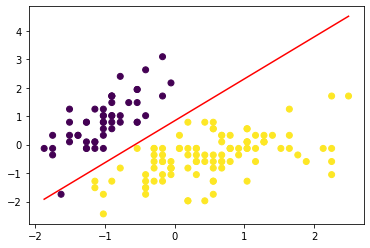

In [14]:
x1_vec = np.linspace(X_s[:,0].min(), X_s[:,0].max(), 2)
plt.scatter(X_s[:,0], X_s[:,1], c=y)
plt.plot(x1_vec, (-x1_vec * thetas[1] - thetas[0]) / thetas[2], color="red")
print(thetas.T)

[47.81414623] [[ 67.26895117 -30.03507304]]


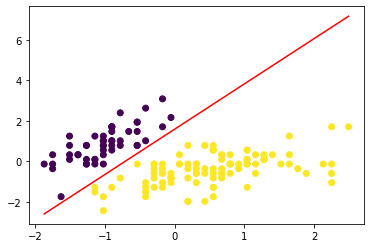

In [9]:
lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)
lgr.fit(X_s, y_initial)
x1_vec = np.linspace(X_s[:,0].min(), X_s[:,0].max(), 2)
plt.scatter(X_s[:,0], X_s[:,1], c=y)
plt.plot(x1_vec, (-x1_vec * lgr.coef_[0][0] - lgr.intercept_)/lgr.coef_[0][1], color='red')
print(lgr.intercept_, lgr.coef_)